**Name:** Nguyễn Thanh Hòa  
**Project Title:**  
**Enhancing Human Resources Insights through Advanced Analytics**  

**Link Report:** [Enhancing Human Resources Insights through  
Advanced Analytics](https://www.overleaf.com/read/pvcbccgknbmn#c16b6f)  

### **The Aim of This Project:**  
+ Utilize data analytics and machine learning to gain deeper insights into our Human Resources (HR) operations.  

=> This can help optimize workforce management, improve employee satisfaction, and enhance overall organizational efficiency, focusing on various HR metrics such as demographics, performance scores, and compensation.  

### **Goals:**  
+ Improve workforce management  
+ Increase employee satisfaction  
+ Optimize compensation strategies  
+ Provide predictive insights  


## **Steps to be performed:**  

### **Data Preparation and Cleaning:**  
- Handle missing values (Replace missing values for numerical attributes with the mean).  
- Feature engineering (Replace missing values for categorical attributes with the most frequent value).  
- Encode and normalize data, handle outliers using the IQR method.  

### **Exploratory Data Analysis (EDA):**  
- Compute descriptive statistics and visualize data distribution (attrition status, attrition rate by department, etc.).  
- Correlation heatmap to identify patterns and support decision-making.  

### **Data Visualization:**  
- Distribution of attrition status.  
- Distribution of employees by job position.  
- Attrition rate by department.  
- Monthly income distribution by job role.  
- Correlation heatmap.  

### **Model Building and Evaluation:** *(To predict employee attrition and performance)*  
- **Logistic Regression**: Classifies employee attrition status.  
- **Random Forest**: Better than Logistic Regression for classifying attrition status.  
- **Regression Models**: Predict **Performance Rating**.  
- **XGBoost**: Classifies attrition status.  
- **LightGBM**: Classifies attrition status.  
- **Gradient Boosting**: Predicts **Performance Rating**.  

### **Evaluation and Recommendations:**  
Summarize model results and provide recommendations.  


# 0.Imporrt

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap

# Data preparation and data cleaning:
### 1. Data loading and preprocessing

In [28]:

data = pd.read_csv("50000 HRA Records.csv")

# Data information:

In [29]:
print("Mô tả về data")
print(data.describe())

Mô tả về data
                Age     DailyRate  DistanceFromHome     Education  \
count  50000.000000  50000.000000      50000.000000  50000.000000   
mean      38.971480    798.677560         25.539780      3.004600   
std       12.420834    405.080217         14.339956      1.414249   
min       18.000000    100.000000          1.000000      1.000000   
25%       28.000000    445.000000         13.000000      2.000000   
50%       39.000000    798.000000         25.000000      3.000000   
75%       50.000000   1151.000000         38.000000      4.000000   
max       60.000000   1500.000000         50.000000      5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction    HourlyRate  \
count        50000.0    50000.000000             50000.000000  50000.000000   
mean             1.0    25000.500000                 2.498360    115.432940   
std              0.0    14433.901067                 1.119671     49.424867   
min              1.0        1.000000            

In [30]:
print("Thông tin về data")
print(data.info())

Thông tin về data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       50000 non-null  int64 
 1   Attrition                 50000 non-null  object
 2   BusinessTravel            50000 non-null  object
 3   DailyRate                 50000 non-null  int64 
 4   Department                50000 non-null  object
 5   DistanceFromHome          50000 non-null  int64 
 6   Education                 50000 non-null  int64 
 7   EducationField            50000 non-null  object
 8   EmployeeCount             50000 non-null  int64 
 9   EmployeeNumber            50000 non-null  int64 
 10  EnvironmentSatisfaction   50000 non-null  int64 
 11  Gender                    50000 non-null  object
 12  HourlyRate                50000 non-null  int64 
 13  JobInvolvement            50000 non-null  int64 
 14  JobL

In [31]:
print("Data")
print(data.head(10))

Data
   Age Attrition     BusinessTravel  DailyRate       Department  \
0   31        No         Non-Travel        158         Software   
1   38        No      Travel_Rarely        985  Human Resources   
2   59       Yes         Non-Travel       1273            Sales   
3   52       Yes      Travel_Rarely        480          Support   
4   32        No         Non-Travel        543  Human Resources   
5   19       Yes         Non-Travel        779         Hardware   
6   42       Yes         Non-Travel        934          Support   
7   30        No      Travel_Rarely        380          Support   
8   41        No  Travel_Frequently       1464         Software   
9   45        No  Travel_Frequently       1020  Human Resources   

   DistanceFromHome  Education    EducationField  EmployeeCount  \
0                 7          3           Medical              1   
1                33          5     Life Sciences              1   
2                 5          2  Technical Degree        

### 1.1 Handling Missing Values
##### Replace missing values ​​for numeric attributes with the mean

In [32]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                   'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                   'YearsSinceLastPromotion', 'YearsWithCurrManager']
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean())

##### Replace missing values ​​for category attributes with the most frequently occurring value

In [33]:
categorical_features = ['Gender', 'Department', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel', 'EducationField']
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

##### Exception handling (example using IQR)

In [34]:
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
    data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])

# Kiểm tra dữ liệu trùng lặp
print("Số lượng bản ghi trùng lặp:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

Số lượng bản ghi trùng lặp: 0


# 1.2 Feature Mining
### Create Age Groups

In [35]:
bins = [18, 25, 35, 45, 55, 60]
labels = ['18-24', '25-34', '35-44', '45-54', '55-60']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

### 1.3 Encoding category attributes

In [36]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### 1.4 Normalize numeric attributes

In [37]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

### 1.5 Combining converters

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features + ['AgeGroup'])
    ])

# 2. Perform Data Analysis (EDA):
### 2.1 Descriptive statistics

In [39]:
print("Thống kê mô tả:")
print(data.describe(include='all'))

Thống kê mô tả:
                 Age Attrition BusinessTravel     DailyRate Department  \
count   50000.000000     50000          50000  50000.000000      50000   
unique           NaN         2              3           NaN          6   
top              NaN       Yes     Non-Travel           NaN      Sales   
freq             NaN     25105          16919           NaN       8453   
mean       38.971480       NaN            NaN    798.677560        NaN   
std        12.420834       NaN            NaN    405.080217        NaN   
min        18.000000       NaN            NaN    100.000000        NaN   
25%        28.000000       NaN            NaN    445.000000        NaN   
50%        39.000000       NaN            NaN    798.000000        NaN   
75%        50.000000       NaN            NaN   1151.000000        NaN   
max        60.000000       NaN            NaN   1500.000000        NaN   

        DistanceFromHome     Education EducationField  EmployeeCount  \
count       50000.00000

### 2.2.2 Attrition rate by department

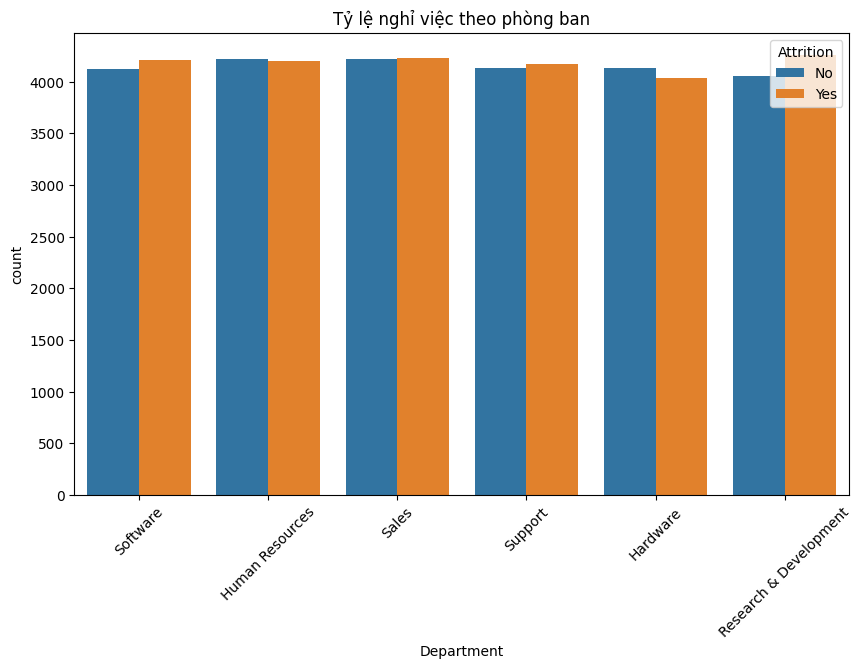

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Tỷ lệ nghỉ việc theo phòng ban')
plt.xticks(rotation=45)
plt.show()

**Remarks:** Shows the difference in turnover rates between departments. For example, Software and Research & Development have higher turnover rates than Human Resources and Hardware.

### 3.Data Visualization
##### 3.3.1_a Distribution of Absenteeism

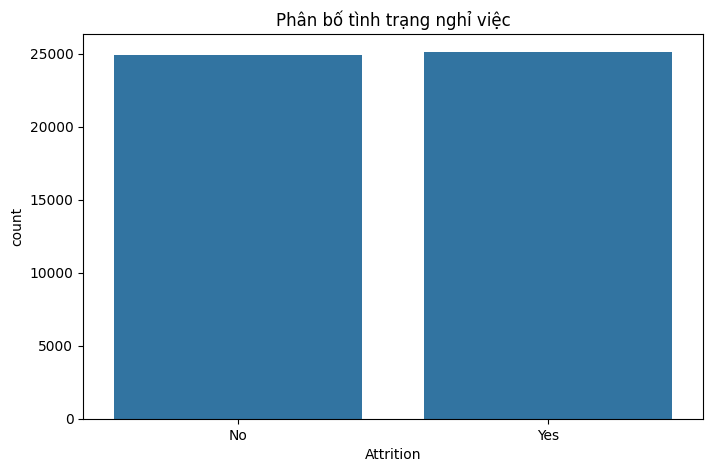

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=data)
plt.title('Phân bố tình trạng nghỉ việc')
plt.show()

**Comment**: Shows that the turnover rate ("Yes") accounts for a significant portion, which may be a sign that needs attention to find out the cause and find a solution to retain employees.

##### 3.3.1_b Employee distribution by position

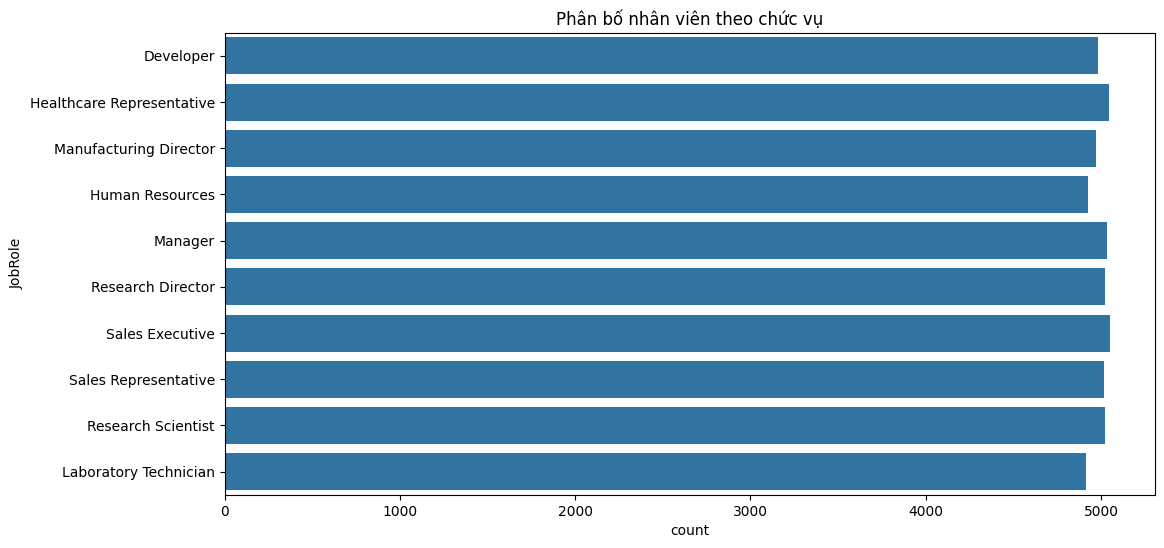

In [ ]:
# Employee distribution by position
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', data=data)
plt.title('Phân bố nhân viên theo chức vụ')
plt.show()

**Remarks**: Shows that the number of employees is relatively evenly distributed across most positions in the company.

### Description: Column chart showing the number of employees for each position (JobRole).

### 3.3.1_c Distribution of monthly income by job role (Other description)

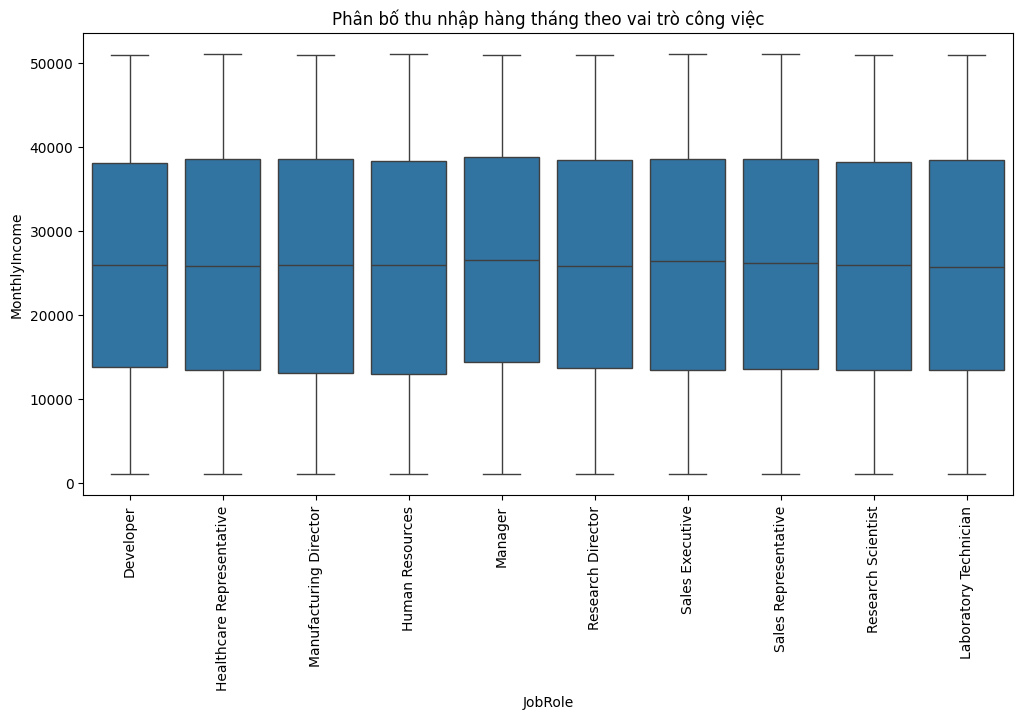

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=data)
plt.title('Phân bố thu nhập hàng tháng theo vai trò công việc')
plt.xticks(rotation=90)
plt.show()

**Comment**: The company's salary policy is relatively fair, but there is still income differentiation between individuals in the same job position. The wide salary range shows that the company may be applying a salary and bonus policy based on individual ability and experience.

### 3.3.1.d Employee distribution by department

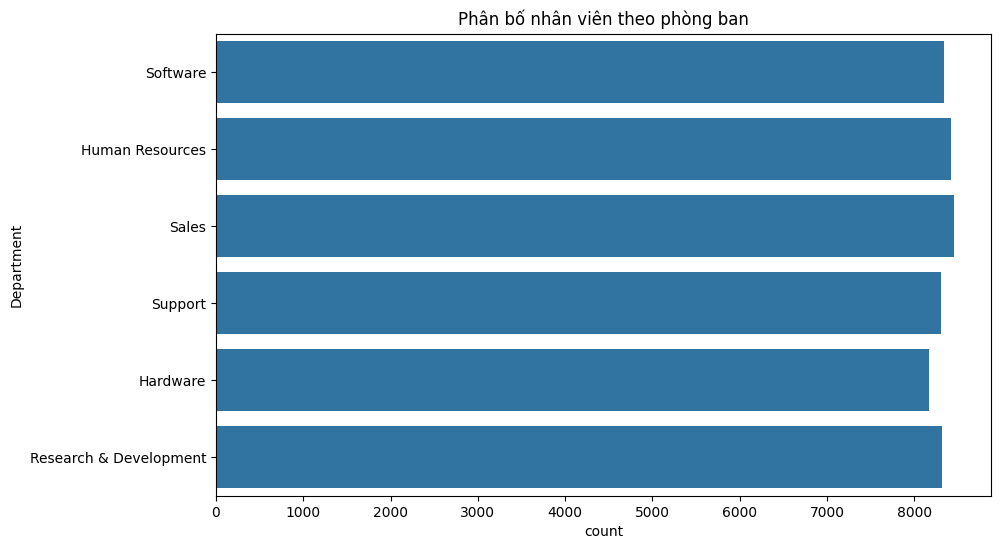

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Department', data=data)
plt.title('Phân bố nhân viên theo phòng ban')
plt.show()

**Comment**: Shows a relatively even distribution of personnel among departments in the company.

### 3.3.2 Correlation heatmap

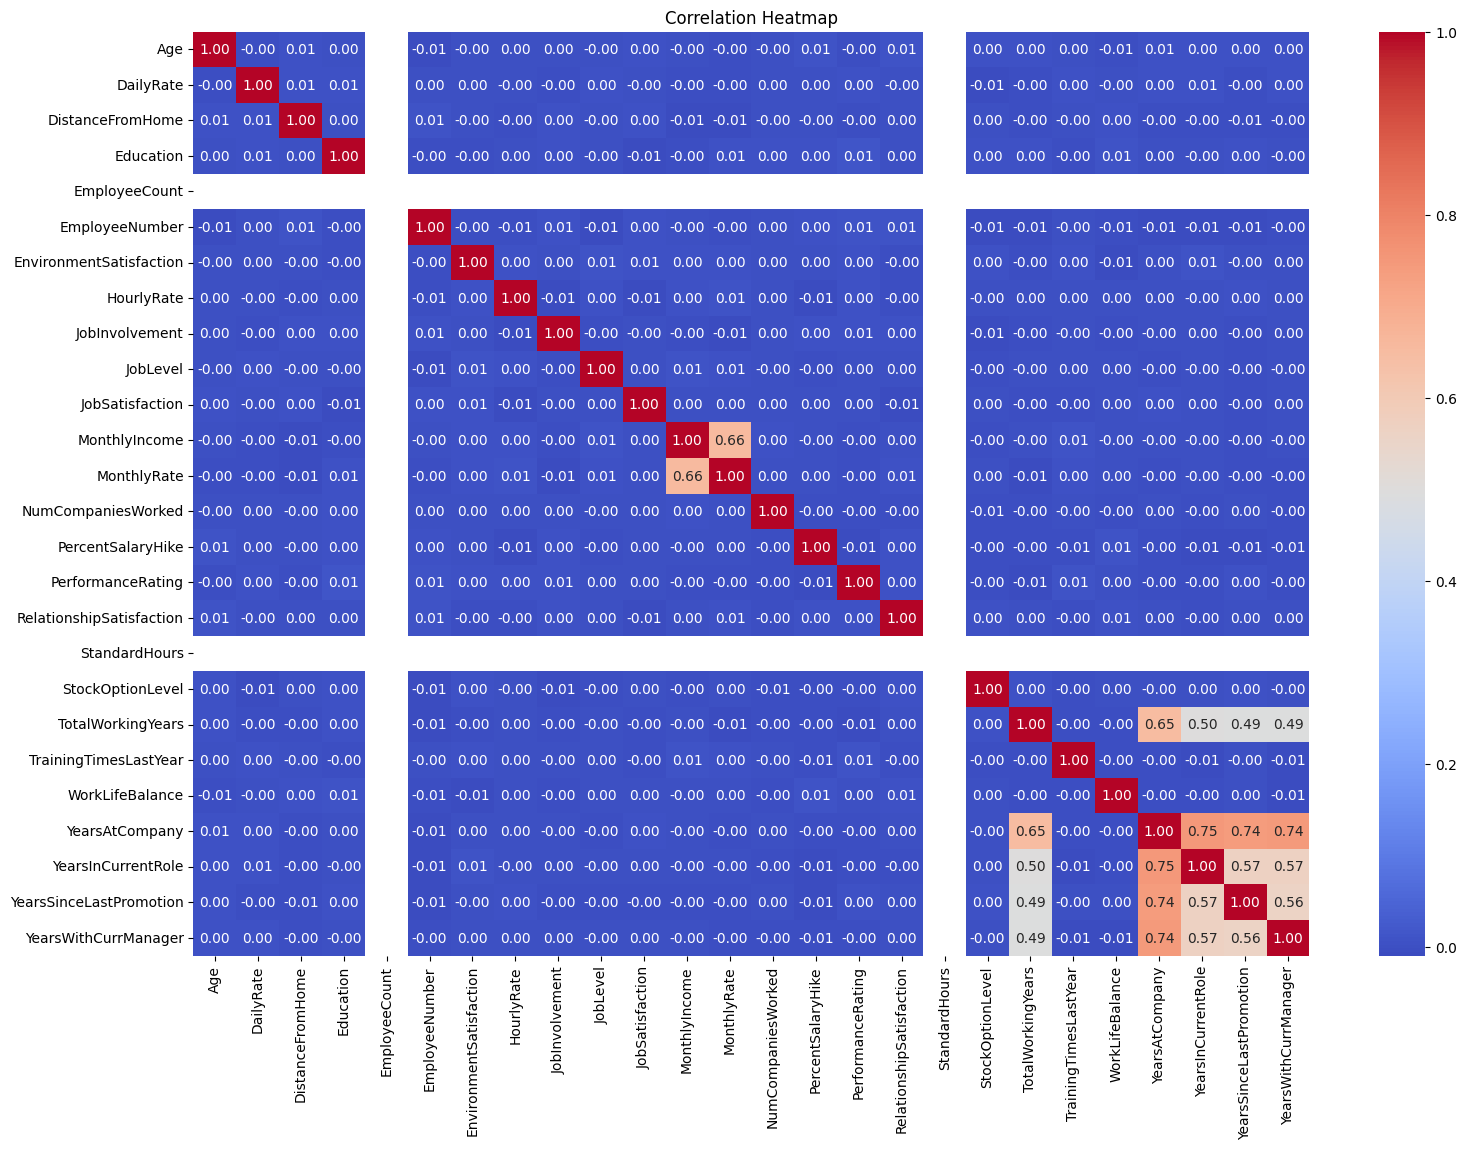

In [45]:
data_numeric = data.select_dtypes(include=[float, int])

plt.figure(figsize=(18, 12))
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Remarks**:
+ JobLevel,MonthlyIncome,Age have data > 0.5 showing a strong correlation, the longer an employee has worked, the higher the rank and income, the higher the age (this is quite obvious) in the higher job.
+ YearsInCurrentRole, YearsWithCurrManager, YearsSinceLastPromotion, PercentSalaryHike with PerformanceRating have a strong correlation of 0.7 or higher showing that employees who have been with the company for a long time often have a longer working time and are associated with the current company.

**General Assessment**:
+ **The company has a fairly balanced organizational structure**, with departments having a relatively equal number of employees.
+ **Salary policy**: relatively fair, but there is still income differentiation between individuals in the same job position, based on ability and experience, but it is necessary to closely monitor to ensure fairness and avoid internal dissatisfaction.
+ **Long-term employees**: Usually have higher ranks, incomes and ages.

### 3.3.3 Salary distribution

In [46]:
print("Column names in the dataset:")
print(data.columns)

Column names in the dataset:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeGroup'],
      dtype='object')


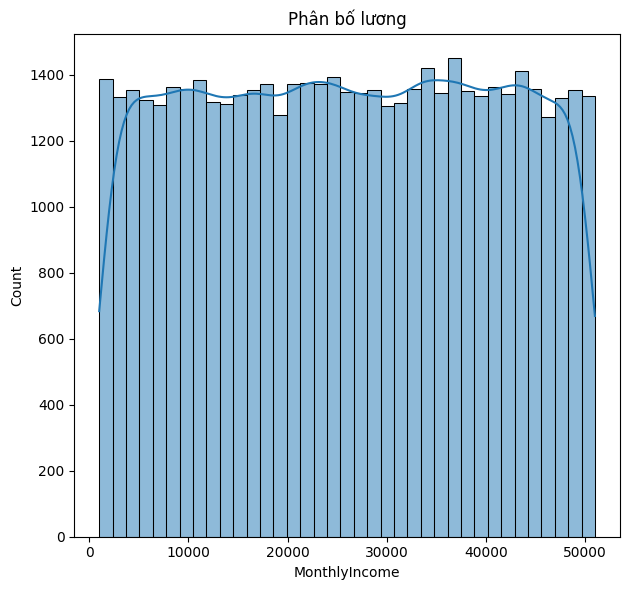

In [ ]:
#Draw a histogram to show the distribution of monthly salaryplt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['MonthlyIncome'], kde=True)
plt.title('Phân bố lương')

plt.tight_layout()
plt.show()

**Comments**:
+ The company's salary policy seems to be quite fair as the salary is distributed relatively evenly between 0 and 50,000. There is not too much difference between income groups.
+ Popular salary level: Most employees are concentrated in the income group from 5,000 to 15,000

# 4. Building a predictive model
#### 4.1 Preparing data for the model

In [48]:
print("Column names in the dataset:")
print(data.columns)
X = data.rename(columns={"Tên_cột_cũ_1": "ActualColumn1", "Tên_cột_cũ_2": "ActualColumn2"})
y_classification = data['Attrition']
y_regression = data['PerformanceRating']

Column names in the dataset:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeGroup'],
      dtype='object')


In [49]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# 4.2 Training and Evaluation of Classification Models
### 4.2.1 Logistic Regression

In [50]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(preprocessor.fit_transform(X_train_clf), y_train_clf)
y_pred_clf_log_reg = log_reg.predict(preprocessor.transform(X_test_clf))
y_pred_proba_log_reg = log_reg.predict_proba(preprocessor.transform(X_test_clf))[:, 1]

### Display the results of the Logistic Regression model

In [51]:
print("\nHồi quy Logistic:")
print(classification_report(y_test_clf, y_pred_clf_log_reg))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test_clf, y_pred_clf_log_reg))
print("ROC-AUC:", roc_auc_score(y_test_clf, y_pred_proba_log_reg))


Hồi quy Logistic:
              precision    recall  f1-score   support

          No       0.49      0.47      0.48      4931
         Yes       0.50      0.53      0.52      5069

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Ma trận nhầm lẫn:
[[2301 2630]
 [2398 2671]]
ROC-AUC: 0.4985242989674954


### 4.2.2 Random Forest Model (Classification)

In [52]:
rf_clf = RandomForestClassifier(random_state=42)
param_grid_rf_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf_clf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf_clf.fit(preprocessor.fit_transform(X_train_clf), y_train_clf)
y_pred_clf_rf = grid_search_rf_clf.predict(preprocessor.transform(X_test_clf))
y_pred_proba_rf_clf = grid_search_rf_clf.predict_proba(preprocessor.transform(X_test_clf))[:, 1]


Fitting 5 folds for each of 27 candidates, totalling 135 fits


### Display RandomForestClassifier model results

In [53]:
print("\nMô hình rừng ngẫu nhiên (Phân loại):")
print(classification_report(y_test_clf, y_pred_clf_rf))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test_clf, y_pred_clf_rf))
print("ROC-AUC:", roc_auc_score(y_test_clf, y_pred_proba_rf_clf))
print("Tham số tốt nhất:", grid_search_rf_clf.best_params_)


Mô hình rừng ngẫu nhiên (Phân loại):
              precision    recall  f1-score   support

          No       0.50      0.49      0.49      4931
         Yes       0.51      0.51      0.51      5069

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Ma trận nhầm lẫn:
[[2428 2503]
 [2473 2596]]
ROC-AUC: 0.49875282248751446
Tham số tốt nhất: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


# 4.2.3 XGBoost Model (Classification)

In [54]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Huấn luyện LabelEncoder với dữ liệu huấn luyện và chuyển đổi nhãn y
y_train_encoded = label_encoder.fit_transform(y_train_clf)

# Khởi tạo mô hình XGBClassifier
xgb_clf = XGBClassifier(random_state=42)

# Thiết lập tham số cho Grid Search
param_grid_xgb_clf = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Huấn luyện mô hình với nhãn đã được chuyển đổi
grid_search_xgb_clf = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb_clf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_xgb_clf.fit(preprocessor.fit_transform(X_train_clf), y_train_encoded)

# Dự đoán nhãn
y_pred_clf_xgb = grid_search_xgb_clf.predict(preprocessor.transform(X_test_clf))
y_pred_clf_xgb = label_encoder.inverse_transform(y_pred_clf_xgb) 

# Dự đoán xác suất
y_pred_proba_xgb_clf = grid_search_xgb_clf.predict_proba(preprocessor.transform(X_test_clf))[:, 1]


Fitting 5 folds for each of 27 candidates, totalling 135 fits


### Show XGBoost Model Results

In [55]:
print("\nMô hình XGBoost (Phân loại):")
print(classification_report(y_test_clf, y_pred_clf_xgb))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test_clf, y_pred_clf_xgb))
print("ROC-AUC:", roc_auc_score(y_test_clf, y_pred_proba_xgb_clf))
print("Tham số tốt nhất:", grid_search_xgb_clf.best_params_)


Mô hình XGBoost (Phân loại):
              precision    recall  f1-score   support

          No       0.49      0.46      0.47      4931
         Yes       0.51      0.54      0.52      5069

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Ma trận nhầm lẫn:
[[2244 2687]
 [2322 2747]]
ROC-AUC: 0.5021823156001829
Tham số tốt nhất: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}


# 4.2.4 LightGBM Model (Classification) :

In [ ]:
lgb_clf = LGBMClassifier(random_state=42)
param_grid_lgb_clf = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
grid_search_lgb_clf = GridSearchCV(estimator=lgb_clf, param_grid=param_grid_lgb_clf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_lgb_clf.fit(preprocessor.fit_transform(X_train_clf), y_train_clf)
y_pred_clf_lgb = grid_search_lgb_clf.predict(preprocessor.transform(X_test_clf))
y_pred_proba_lgb_clf = grid_search_lgb_clf.predict_proba(preprocessor.transform(X_test_clf))[:, 1]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 20036, number of negative: 19964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500900 -> initscore=0.003600
[LightGBM] [Info] Start training from score 0.003600
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

### Show LightGBM Model Results

In [ ]:
print("\nMô hình LightGBM (Phân loại):")
print(classification_report(y_test_clf, y_pred_clf_lgb))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test_clf, y_pred_clf_lgb))
print("ROC-AUC:", roc_auc_score(y_test_clf, y_pred_proba_lgb_clf))
print("Tham số tốt nhất:", grid_search_lgb_clf.best_params_)


Mô hình LightGBM (Phân loại):
              precision    recall  f1-score   support

          No       0.49      0.50      0.49      4931
         Yes       0.50      0.50      0.50      5069

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

Ma trận nhầm lẫn:
[[2449 2482]
 [2558 2511]]
ROC-AUC: 0.4991459773599284
Tham số tốt nhất: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# 4.2.5 Training and evaluating the regression model
### 4.2.5_a RandomForestRegressor:

In [57]:
rf_reg = RandomForestRegressor(random_state=42)
param_grid_rf_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf_reg = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf_reg, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf_reg.fit(preprocessor.fit_transform(X_train_reg), y_train_reg)
y_pred_reg_rf = grid_search_rf_reg.predict(preprocessor.transform(X_test_reg))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


# Display RandomForestRegressor results

In [60]:
print("\nMô hình Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_rf)))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg_rf))
print("R2:", r2_score(y_test_reg, y_pred_reg_rf))
print("Tham số tốt nhất:", grid_search_rf_reg.best_params_)


Mô hình Random Forest Regressor:
MSE: 1.2460844533233608
RMSE: 1.116281529598766
MAE: 0.9967712956859366
R2: -0.0019254828813703995
Tham số tốt nhất: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


# 4.2.5_b Gradient Boosting (Regression) Model

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=42)
param_grid_gb_reg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
grid_search_gb_reg = GridSearchCV(estimator=gb_reg, param_grid=param_grid_gb_reg, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_gb_reg.fit(preprocessor.fit_transform(X_train_reg), y_train_reg)
y_pred_reg_gb = grid_search_gb_reg.predict(preprocessor.transform(X_test_reg))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


# Show Gradient Boosting Model results

In [ ]:
print("\nMô hình Gradient Boosting (Hồi quy):")
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg_gb)))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg_gb))
print("R2:", r2_score(y_test_reg, y_pred_reg_gb))
print("Tham số tốt nhất:", grid_search_gb_reg.best_params_)


Mô hình Gradient Boosting (Hồi quy):
MSE: 1.2441419266228786
RMSE: 1.1154111020708368
MAE: 0.9970273038475392
R2: -0.00036357670623132776
Tham số tốt nhất: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


## 5 Evaluate Conclusions and Make Recommendations
### 5.1 Importance of Features

In [59]:
importances = grid_search_rf_clf.best_estimator_.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Đặc trưng': feature_names, 'Tầm quan trọng': importances})
feature_importance_df = feature_importance_df.sort_values(by='Tầm quan trọng', ascending=False)
print("\nTầm quan trọng của đặc trưng:")
print(feature_importance_df.head(10))


Tầm quan trọng của đặc trưng:
                    Đặc trưng  Tầm quan trọng
3          num__MonthlyIncome        0.101511
1              num__DailyRate        0.097276
2       num__DistanceFromHome        0.069968
5      num__PercentSalaryHike        0.069916
6      num__TotalWorkingYears        0.064528
0                    num__Age        0.057827
8         num__YearsAtCompany        0.056697
11  num__YearsWithCurrManager        0.042766
9     num__YearsInCurrentRole        0.041448
4     num__NumCompaniesWorked        0.041207


**MonthlyIncome is the most important factor** in the prediction, accounting for **10.15%** of the importance. This suggests that **salary** may be one of the **major** factors influencing an employee's decision to leave.

**The next factors** have **relatively equal** importance, ranging from **4% to 7%**, including:

* **DailyRate** (daily salary)
* **DistanceFromHome** (distance from home to the company)
* **PercentSalaryHike** (percentage of salary increase)
* **TotalWorkingYears** (total years of experience)
* **Age** (age)
* **YearsAtCompany** (years with the company)
* **YearsWithCurrManager** (years with the current manager)
* **YearsInCurrentRole** (years in current position)
* **NumCompaniesWorked** (number of companies worked)

# 5.2 SHAP value

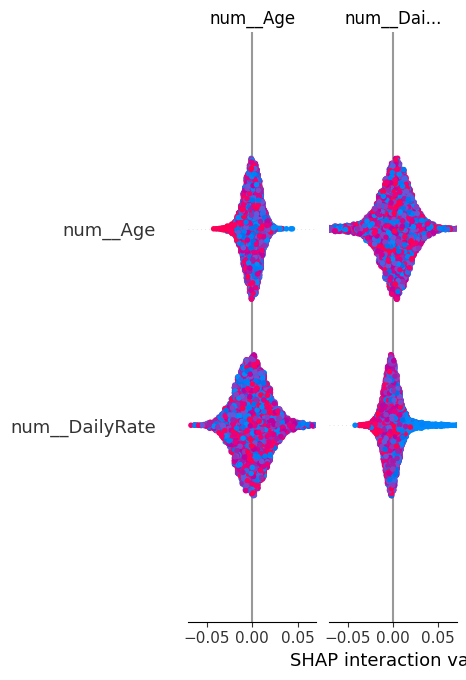

In [ ]:
explainer = shap.TreeExplainer(grid_search_rf_clf.best_estimator_)
shap_values = explainer.shap_values(preprocessor.transform(X_test_clf))
shap.summary_plot(shap_values, preprocessor.transform(X_test_clf), feature_names=feature_names)

**Shap Value Comments**

**Interaction between "num__Age" and "num__DailyRate":** The two graphs on the upper right and lower left show **weak interaction** between age and daily wage. The data points are relatively evenly distributed, with no clear trend, indicating that the **combined effect of these two variables is insignificant**.

**Main effect of "num__Age" and "num__DailyRate":** The two graphs on the upper left and lower right show the main effect of each variable on the prediction results.

* **num__Age:** The blue data points (low "num__Age" values) are concentrated on the negative side, indicating that **low age** tends to **decrease the prediction results**. In contrast, the red data points (high "num__Age" values) are more concentrated on the positive side, indicating that **old age** tends to **increase the prediction result**.

** **num__DailyRate:** The data points are relatively evenly distributed on both the negative and positive sides, indicating that **daily wage** has **an unclear impact** on the prediction result.

**** Conclusion:**

* **The interaction between age and daily wage** has **a weak impact** on the prediction result.

* **Age** has **a significant impact** on the prediction result, while **daily wage** has **an unclear impact**.

**General comments**:
+ Prediction models: Logistic Regression, RandomForestClassifier, XGBoost model, LightGBM model have relatively ineffective prediction rates with Accuracy rates fluctuating around 50%
+ The two Gradient Boosting and Random Forest Regressor models have MSE, RMSE, MAE values ​​ranging from 0.99 to 1.24, showing large prediction errors. It is especially noteworthy that R2 is close to 0 and negative, showing that the prediction model is less effective than using only the average value. Gradient Boostin predicts better than Random Forest Regressor.